### PCA (Principal Component Analysis)
 PCA is a dimensionality reduction technique commonly used in machine learning and data analysis to reduce the number of dimensions (or features) in a dataset while preserving most of the variability or information present in the data. PCA achieves dimensionality reduction by transforming the original features into a new set of orthogonal (uncorrelated) features called principal components.

### Step 1: Load and Preprocess the Diabetes Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Step 2: Apply PCA for Dimensionality Reduction

In [2]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Number of principal components retained
print("Number of Principal Components:", pca.n_components_)


Number of Principal Components: 8


### Step 3: Use Random Forest for Feature Importance
Finally, use Random Forest to identify the most significant features based on the PCA-transformed data.

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on PCA-transformed training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train)

# Feature importance based on Random Forest
feature_importance = rf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]  # Sort indices in descending order

# Get names of the most important features
most_important_features = [diabetes.feature_names[i] for i in sorted_indices]

# Display the most important features
print("Most Important Features:")
for feature in most_important_features:
    print(feature)


Most Important Features:
age
bp
bmi
sex
s3
s1
s4
s2


In [9]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

# Subset the dataset to include only the most important features
X_train_selected = pd.DataFrame(X_train_scaled, columns=diabetes.feature_names)[most_important_features]
X_test_selected = pd.DataFrame(X_test_scaled, columns=diabetes.feature_names)[most_important_features]

# Train a Linear Regression model on the selected features
#model = LinearRegression()


# Train a Random Forest model on the selected features
model= RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error (Linear Regression): 3406.370907865169


In [10]:
# Perform inference (make predictions) using the trained model

# Create new data (example: first 5 samples from the test set)
new_data = X_test_scaled[:5, :]  # Use the scaled version of new data

# Select the same subset of most important features for new data
new_data_selected = pd.DataFrame(new_data, columns=diabetes.feature_names)[most_important_features]

# Use the trained model to make predictions on the new data
predictions = model.predict(new_data_selected)

# Print the predictions
print("Predictions for new data:")
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted Diabetes Progression = {pred:.2f}")

Predictions for new data:
Sample 1: Predicted Diabetes Progression = 173.33
Sample 2: Predicted Diabetes Progression = 190.98
Sample 3: Predicted Diabetes Progression = 131.37
Sample 4: Predicted Diabetes Progression = 251.11
Sample 5: Predicted Diabetes Progression = 140.90


## PCA in classification

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load diabetes dataset (binary classification task)
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > 150).astype(int)  # Binary target based on diabetes progression threshold

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest classifier on PCA-transformed training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7415730337078652
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        49
           1       0.76      0.62      0.68        40

    accuracy                           0.74        89
   macro avg       0.74      0.73      0.73        89
weighted avg       0.74      0.74      0.74        89



In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
feature_names = diabetes.feature_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)  # Choose the number of principal components
X_pca = pca.fit_transform(X_scaled)

# Get the principal component loadings
principal_component_loadings = pca.components_

# Identify the most important features for each principal component
num_components = pca.n_components_
most_important_features = []

for i in range(num_components):
    # Get the absolute values of loadings for the i-th principal component
    abs_loadings = np.abs(principal_component_loadings[i])

    # Sort the absolute loadings in descending order and get the corresponding feature names
    sorted_indices = np.argsort(abs_loadings)[::-1]
    important_features = [feature_names[idx] for idx in sorted_indices]

    # Store the most important features for this principal component
    most_important_features.append(important_features)

# Print the most important features for each principal component
for i in range(num_components):
    print(f"Most important features for Principal Component {i+1}:")
    print(most_important_features[i])
    print()


Most important features for Principal Component 1:
['s4', 's5', 's2', 's1', 's6', 'bmi', 's3', 'bp', 'age', 'sex']

Most important features for Principal Component 2:
['s1', 's3', 's2', 'sex', 'bmi', 'bp', 's6', 's4', 'age', 's5']

Most important features for Principal Component 3:
['bp', 'age', 's3', 's4', 's6', 's2', 'bmi', 'sex', 's1', 's5']



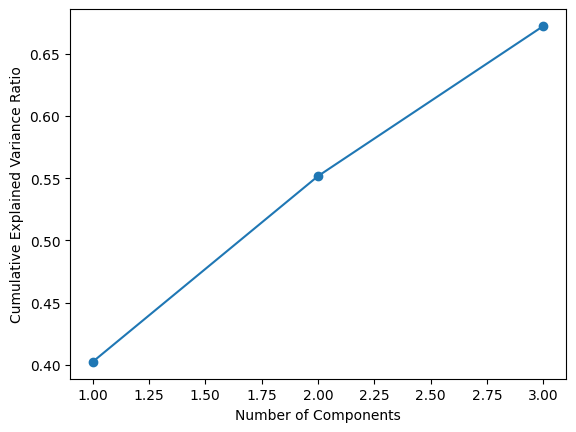

In [14]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
#elbow method
import matplotlib.pyplot as plt

plt.plot(np.arange(1, len(explained_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


Based on these lists and the elbow point indicating that 2 principal components capture a significant portion of the variance, we consider using 2 principal components for further analysis.

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load diabetes dataset (binary classification task)
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > 150).astype(int)  # Binary target based on diabetes progression threshold

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a Random Forest classifier on the PCA-transformed training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6853932584269663
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        49
           1       0.67      0.60      0.63        40

    accuracy                           0.69        89
   macro avg       0.68      0.68      0.68        89
weighted avg       0.68      0.69      0.68        89

